## Common Features Model

The model in this notebook will be built based off of features options that home-buyers have when searching for houses using two major real estate sites:
* Zillow
* MLS Real Estate

### Zillow Search Features

Zillow offers the following options when searching for homes for sale through their site:
1. Price range (e.g. 250,000 - 500,000)
1. Number of Bedrooms
1. Number of Bathrooms
1. Home Type:
    * Houses, Townhouses, Multi-Family, Condos, lots/land, etc.
1. HOA Max Fee (0, 50/month, 100/month, etc.)
1. Garage?
1. Square Feet
1. Lot Size
1. Year Built Range 
1. Basement?
1. Number of stories
1. Amenities
    * A/C, Pool, Waterfront
1. View (city, mountain, water, park)
1. Days on Zillow
1. Keyword Search Function

Source: ('https://www.zillow.com/loveland-co/')

### MLS Search Features

MLS Real Estate offers the following options when searching for homes for sale through their site:
1. Area/Location (search function via zip code, street address, or city)
1. Price range (e.g. 250,000 - 500,000)
1. Number of Bedrooms
1. Number of Bathrooms
1. Square Feet
1. Lot Size
1. Property Type:
    * Houses, Townhouses/Condos/Co-Op, Multi-Family, lots/land, rentals
1. Listing Type:
    * Resale/Ne, Foreclosure, Short Sale, Lease/Rental

Source ('https://www.buyorsellnocohomes.com/advancedsearch/areas/42388/')

### Features Common to Zillow and MLS

Zillow appears to have nearly twice the number of features for home-buyers to use to search through vs. MLS Real Estate. This is a bit surprising to me as I have personally had many realtors advise me to use MLS over Zillow. This difference could also be due to using the public MLS search options vs. a search option that a specific realtor has setup for a client.

Still to get an accurate model that represents the common features that an average home-buyer or realtor might use I will only be using the features that are in both MLS and Zillow:
1. Number of Bedrooms
1. Number of Bathrooms
1. Square Feet
1. Lot Size
1. Property Type:
    * Houses, Townhouses/Condos/Co-Op, Multi-Family, lots/land, rentals

### Cleaning and EDA

In [1]:
import numpy as np 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [3]:
train_clean = pd.read_csv('./datasets/train_data_cleaned_v1')

In [4]:
train_clean.head(3)

,Unnamed: 0,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,60,RL,0.0,13517,Pave,no,IR1,Lvl,AllPub,...,0,0,0,no,0,0,3,2010,WD,130500
1,1,60,RL,43.0,11492,Pave,no,IR1,Lvl,AllPub,...,0,0,0,no,0,0,4,2009,WD,220000
2,2,20,RL,68.0,7922,Pave,no,Reg,Lvl,AllPub,...,0,0,0,no,0,0,1,2010,WD,109000


In [5]:
train_clean[['ms_subclass']].value_counts()

ms_subclass
20             769
60             393
50             198
120            132
30             101
70              90
160             88
80              86
90              75
190             46
85              28
75              16
45              11
180             11
40               4
150              1
dtype: int64

In [6]:
ms_class_dummies = pd.get_dummies(data=train_clean['ms_subclass'], prefix='ms_subclass_', drop_first=True)

In [7]:
ms_class_dummies.columns

Index(['ms_subclass__30', 'ms_subclass__40', 'ms_subclass__45',
       'ms_subclass__50', 'ms_subclass__60', 'ms_subclass__70',
       'ms_subclass__75', 'ms_subclass__80', 'ms_subclass__85',
       'ms_subclass__90', 'ms_subclass__120', 'ms_subclass__150',
       'ms_subclass__160', 'ms_subclass__180', 'ms_subclass__190'],
      dtype='object')

In [8]:
#Features for model: 
#Number of Bedrooms X
#Number of Bathrooms X
#Square Feet X
#Lot Size X
# Property Type, likely need to one hot encode property type
ms_class_dummies = pd.get_dummies(data=train_clean['ms_subclass'], prefix='ms_subclass_', drop_first=True)

#create total sqft variable
train_clean['total_sf'] = train_clean['total_bsmt_sf'] + train_clean['gr_liv_area']
#joining with overall DF
#train_clean = train_clean.join(other= ms_class_dummies)
#references (https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe ; https://pandas.pydata.org/docs/user_guide/merging.html)

#features
features = ['bedroom_abvgr', 'full_bath', 'totrms_abvgrd', 'total_sf', 'lot_area', 'ms_subclass__30', 'ms_subclass__40', 'ms_subclass__45',
            'ms_subclass__50', 'ms_subclass__60', 'ms_subclass__70', 'ms_subclass__75', 'ms_subclass__80', 'ms_subclass__85',
            'ms_subclass__90', 'ms_subclass__120', 'ms_subclass__160', 'ms_subclass__180', 'ms_subclass__190']

In [9]:
train_clean.fillna(0, inplace=True)

In [10]:
train_clean.isna().sum().sum()

0

In [11]:
#had to drop ms_150 as it is not in the test set
features = ['bedroom_abvgr', 'full_bath', 'totrms_abvgrd', 'total_sf', 'lot_area', 'ms_subclass__30', 'ms_subclass__40', 'ms_subclass__45',
            'ms_subclass__50', 'ms_subclass__60', 'ms_subclass__70', 'ms_subclass__75', 'ms_subclass__80', 'ms_subclass__85',
            'ms_subclass__90', 'ms_subclass__120', 'ms_subclass__160', 'ms_subclass__180', 'ms_subclass__190']

In [12]:
train_clean = train_clean.join(other= ms_class_dummies)

In [13]:
train_clean[features]

,bedroom_abvgr,full_bath,totrms_abvgrd,total_sf,lot_area,ms_subclass__30,ms_subclass__40,ms_subclass__45,ms_subclass__50,ms_subclass__60,ms_subclass__70,ms_subclass__75,ms_subclass__80,ms_subclass__85,ms_subclass__90,ms_subclass__120,ms_subclass__160,ms_subclass__180,ms_subclass__190
0,3,2,6,2204.0,13517,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,4,2,8,3035.0,11492,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,1,5,2114.0,7922,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2,7,1828.0,9802,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3,2,6,2121.0,14235,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,3,2,7,3612.0,11449,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2045,1,1,4,1722.0,12342,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2046,3,1,9,2809.0,7558,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2047,3,1,6,2400.0,10400,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Visualizatons Check

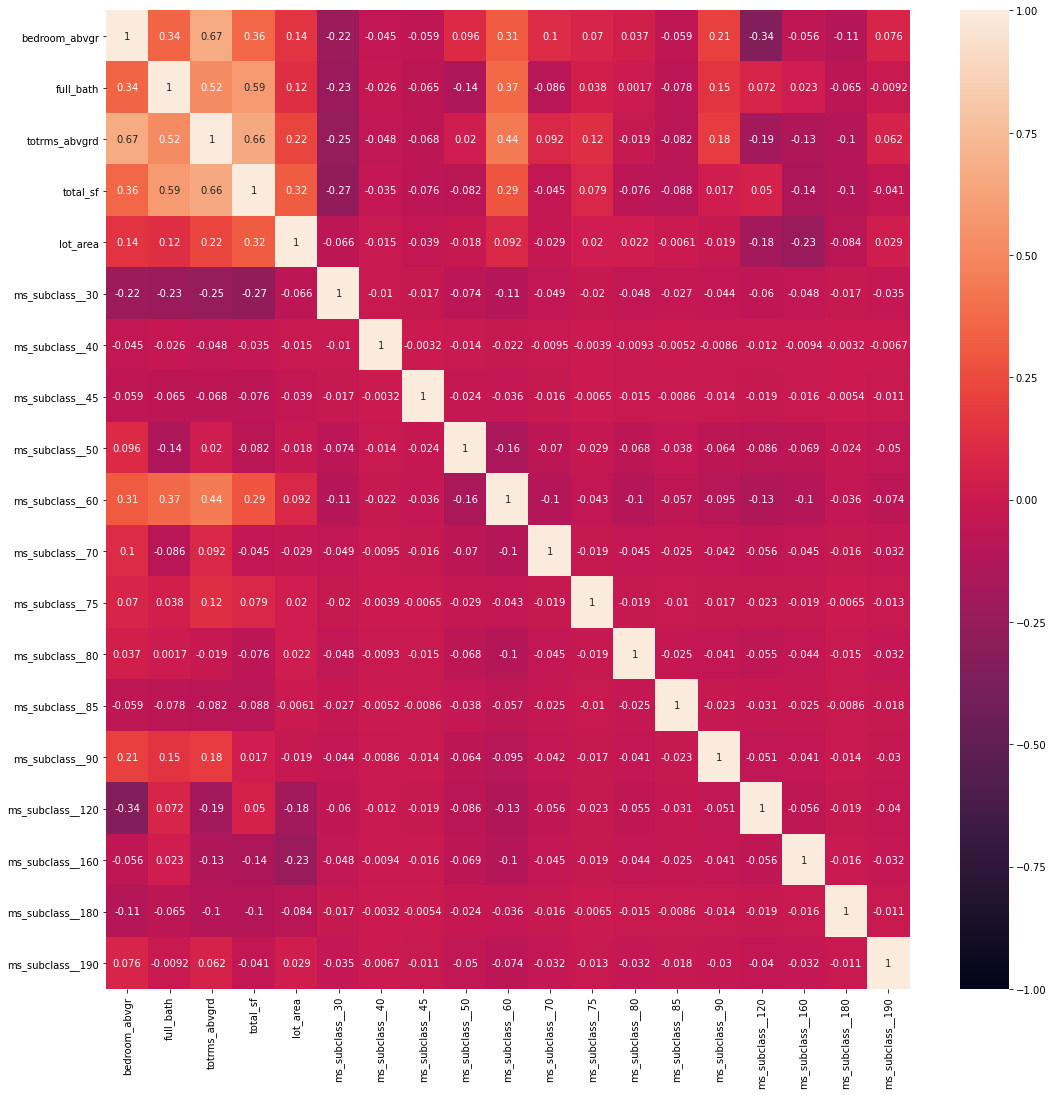

In [45]:
plt.figure(figsize= (18,18))

sns.heatmap(train_clean[features].corr() , annot= True,
           vmin= -1, vmax= 1);

In [15]:
### value type check, looks like were good to head straight to modeling
train_clean[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedroom_abvgr     2049 non-null   int64  
 1   full_bath         2049 non-null   int64  
 2   totrms_abvgrd     2049 non-null   int64  
 3   total_sf          2049 non-null   float64
 4   lot_area          2049 non-null   int64  
 5   ms_subclass__30   2049 non-null   uint8  
 6   ms_subclass__40   2049 non-null   uint8  
 7   ms_subclass__45   2049 non-null   uint8  
 8   ms_subclass__50   2049 non-null   uint8  
 9   ms_subclass__60   2049 non-null   uint8  
 10  ms_subclass__70   2049 non-null   uint8  
 11  ms_subclass__75   2049 non-null   uint8  
 12  ms_subclass__80   2049 non-null   uint8  
 13  ms_subclass__85   2049 non-null   uint8  
 14  ms_subclass__90   2049 non-null   uint8  
 15  ms_subclass__120  2049 non-null   uint8  
 16  ms_subclass__160  2049 non-null   uint8  


### Modeling

In [16]:
#setup our X and y and train, test, split
X = train_clean[features]
y = train_clean['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 3792)

In [17]:
#instantiate Lin Reg and fit it on X_train and y_train
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [18]:
#check the training set scores
round(lr.score(X_train, y_train), 4)

0.7767

In [19]:
#check the testing set scores
round(lr.score(X_test, y_test), 4)

0.7341

In [20]:
#check the cross val score
cross_val_score(lr, X_train, y_train).mean()

0.7676674059749482

Interpretation of Above Scores:
* We may have ended up with a bit of a sampling issue given the discrepancy between the testing score and the cross val, lets try a larger K-Fold and see if that fixes it.

In [21]:
#still off by about .03
cross_val_score(lr, X_train, y_train, cv= 10).mean()

0.7651083852027901

#### Predictions and Checking MSE and RMSE

In [22]:
preds = lr.predict(X_test)

In [23]:
#MSE for Train
mean_squared_error(y_train, lr.predict(X_train))

1440112309.4408896

In [24]:
#RMSE for Train
round((mean_squared_error(y_train, lr.predict(X_train)) ** .5), 2)

37948.81

In [25]:
#MSE for Train
round(mean_squared_error(y_test, lr.predict(X_test)), 2)

1534029322.84

In [26]:
#RMSE for Test
round((mean_squared_error(y_test, lr.predict(X_test)) ** .5), 2)

39166.69

In [27]:
#Lets check the coefficients
list(zip(features, lr.coef_))

[('bedroom_abvgr', -25308.751223395117),
 ('full_bath', 10392.427271889526),
 ('totrms_abvgrd', 6801.936571301558),
 ('total_sf', 74.63029247635586),
 ('lot_area', 0.8231512245220074),
 ('ms_subclass__30', -21443.65426138036),
 ('ms_subclass__40', -32347.22906277918),
 ('ms_subclass__45', -15983.039893324709),
 ('ms_subclass__50', -24931.10337150382),
 ('ms_subclass__60', 23645.568515498882),
 ('ms_subclass__70', -6437.25016976122),
 ('ms_subclass__75', -40680.79262137717),
 ('ms_subclass__80', 11174.15684124604),
 ('ms_subclass__85', 14972.144703959162),
 ('ms_subclass__90', -44718.07745353788),
 ('ms_subclass__120', 428.3018178749534),
 ('ms_subclass__160', -322.1127481059796),
 ('ms_subclass__180', 2606.440188076961),
 ('ms_subclass__190', -41437.81501364814)]

In [28]:
saleprice = lr.predict(X_test)

##### Fitting on the testing Data

In [29]:
test_df = pd.read_csv('./datasets/test.csv')

In [30]:
#making columns same as train dataset
test_df.rename(str.lower, axis=1, inplace=True)

In [31]:
test_df.columns = test_df.columns.str.replace(' ', '_')

In [32]:
#features for test
#Features for model: 
#Number of Bedrooms X
#Number of Bathrooms X
#Square Feet X
#Lot Size X
# Property Type, likely need to one hot encode property type
ms_class_dummies = pd.get_dummies(data=test_df['ms_subclass'], prefix='ms_subclass_', drop_first=True)

#create total sqft variable
test_df['total_sf'] = test_df['total_bsmt_sf'] + test_df['gr_liv_area']
#joining with overall DF
#train_clean = train_clean.join(other= ms_class_dummies)
#references (https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe ; https://pandas.pydata.org/docs/user_guide/merging.html)

#features
features = ['bedroom_abvgr', 'full_bath', 'totrms_abvgrd', 'total_sf', 'lot_area', 'ms_subclass__30', 'ms_subclass__40', 'ms_subclass__45',
            'ms_subclass__50', 'ms_subclass__60', 'ms_subclass__70', 'ms_subclass__75', 'ms_subclass__80', 'ms_subclass__85',
            'ms_subclass__90', 'ms_subclass__120', 'ms_subclass__150','ms_subclass__160', 'ms_subclass__180', 'ms_subclass__190']

In [33]:
test_df = test_df.join(other= ms_class_dummies)

In [34]:
test_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,ms_subclass__60,ms_subclass__70,ms_subclass__75,ms_subclass__80,ms_subclass__85,ms_subclass__90,ms_subclass__120,ms_subclass__160,ms_subclass__180,ms_subclass__190
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0


In [35]:
features = ['bedroom_abvgr', 'full_bath', 'totrms_abvgrd', 'total_sf', 'lot_area', 'ms_subclass__30', 'ms_subclass__40', 'ms_subclass__45',
            'ms_subclass__50', 'ms_subclass__60', 'ms_subclass__70', 'ms_subclass__75', 'ms_subclass__80', 'ms_subclass__85',
            'ms_subclass__90', 'ms_subclass__120', 'ms_subclass__160', 'ms_subclass__180', 'ms_subclass__190']

In [36]:
test=  test_df[features]

In [37]:
test.isna().sum()

bedroom_abvgr       0
full_bath           0
totrms_abvgrd       0
total_sf            0
lot_area            0
ms_subclass__30     0
ms_subclass__40     0
ms_subclass__45     0
ms_subclass__50     0
ms_subclass__60     0
ms_subclass__70     0
ms_subclass__75     0
ms_subclass__80     0
ms_subclass__85     0
ms_subclass__90     0
ms_subclass__120    0
ms_subclass__160    0
ms_subclass__180    0
ms_subclass__190    0
dtype: int64

In [38]:
test

,bedroom_abvgr,full_bath,totrms_abvgrd,total_sf,lot_area,ms_subclass__30,ms_subclass__40,ms_subclass__45,ms_subclass__50,ms_subclass__60,ms_subclass__70,ms_subclass__75,ms_subclass__80,ms_subclass__85,ms_subclass__90,ms_subclass__120,ms_subclass__160,ms_subclass__180,ms_subclass__190
0,4,2,9,2948,9142,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,2,10,3934,9662,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,2,7,2150,17104,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2,1,5,1936,8520,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1,6,2788,9500,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,4,2,8,2961,8000,0,0,0,0,1,0,0,0,0,0,0,0,0,0
874,4,2,9,3092,14670,0,0,0,0,1,0,0,0,0,0,0,0,0,0
875,3,1,5,2163,8250,0,0,0,0,0,0,0,0,0,0,0,0,0,0
876,3,1,5,1728,9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
lr.predict(test)[14]

220079.6271955636

In [40]:
test_df['saleprice'] = lr.predict(test)

In [41]:
common_feature_model = test_df[['id', 'saleprice']]

In [42]:
common_feature_model.set_index('id', inplace=True)

In [43]:
common_feature_model.to_csv('./datasets/common_feature_model.csv')